In [37]:
from google.colab import files
files.upload()  # Upload kaggle.json



Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"abhinavshree","key":"b5506316a5e8446ca1287a1ddf551c9b"}'}

In [38]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [39]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess



Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!unzip toronto-emotional-speech-set-tess.zip -d tess_data



Archive:  toronto-emotional-speech-set-tess.zip
replace tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [43]:
import os

base_dir = "tess_data"

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        print(f"📁 Folder: {folder}")
        print(f"   → Contains {len(os.listdir(folder_path))} files")


📁 Folder: TESS Toronto emotional speech set data
   → Contains 14 files
📁 Folder: tess toronto emotional speech set data
   → Contains 1 files


In [54]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [55]:
import os

paths = []
labels = []

for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        if filename.endswith(".wav"):  # ✅ Only keep audio files
            full_path = os.path.join(dirname, filename)
            paths.append(full_path)

            # Extract label from directory name (e.g., 'OAF_Pleasant_surprise')
            label = dirname.split('_')[-1]
            labels.append(label.lower())

print("Dataset is loaded")


Dataset is loaded


In [56]:
len(paths)

5600

In [57]:
print(paths[:10])
print(labels[:10])

['tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_lot_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dog_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mood_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_nice_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_home_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_seize_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pool_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_search_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_calm_ps.wav', 'tess_data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_tape_ps.wav']
['surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', '

In [65]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,tess_data/TESS Toronto emotional speech set da...,surprise
1,tess_data/TESS Toronto emotional speech set da...,surprise
2,tess_data/TESS Toronto emotional speech set da...,surprise
3,tess_data/TESS Toronto emotional speech set da...,surprise
4,tess_data/TESS Toronto emotional speech set da...,surprise


In [66]:
df['label'] = df['label'].replace('surprised', 'surprise')
df['label'].value_counts()

,count
label,
surprise,800
fear,800
happy,800
angry,800
disgust,800
sad,800
neutral,800


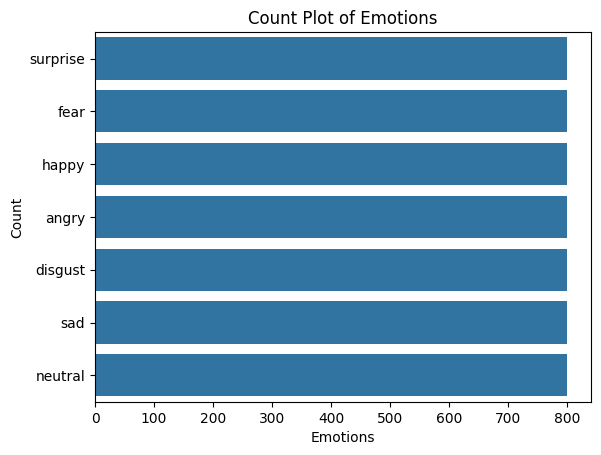

In [75]:
sns.countplot(df['label'])
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Count Plot of Emotions')
plt.show()

In [68]:
def waveplot ( data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()
def spectogram(data,sr,emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()


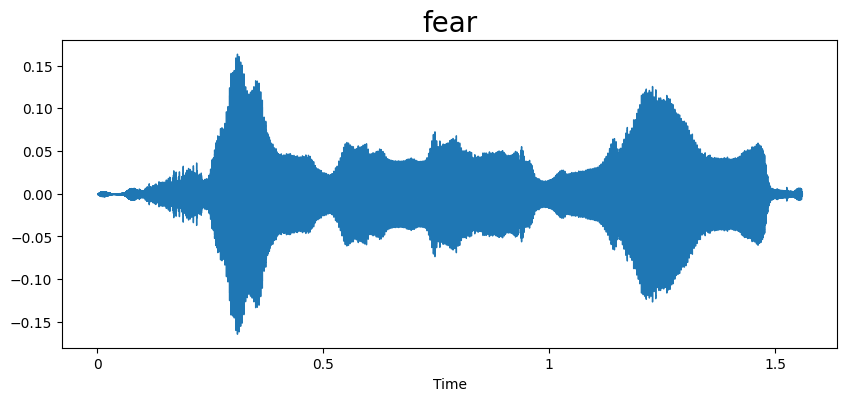

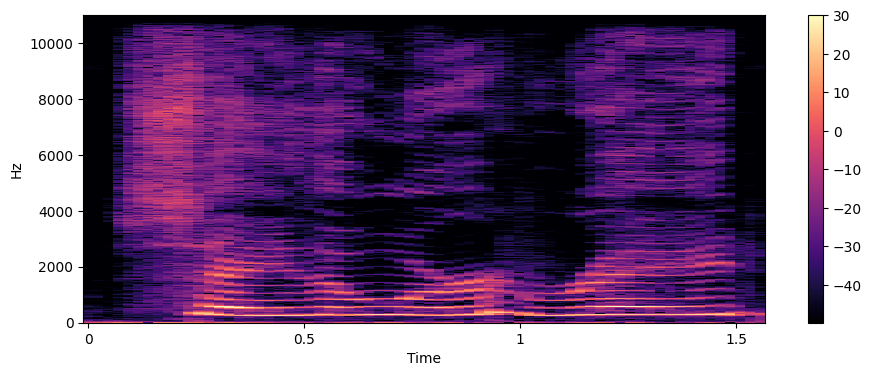

In [69]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

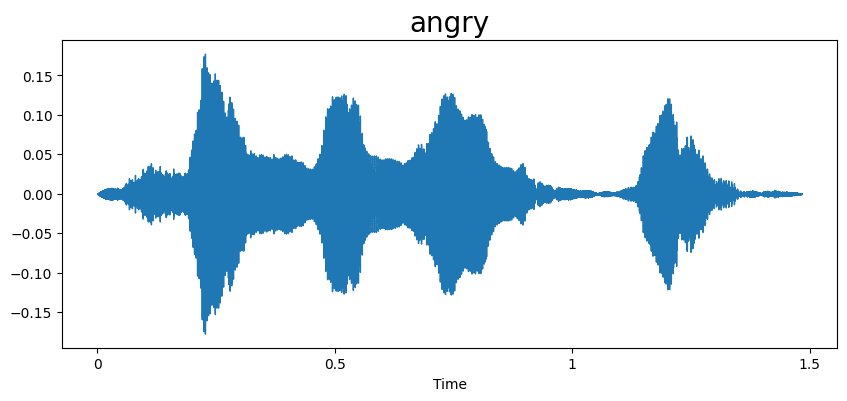

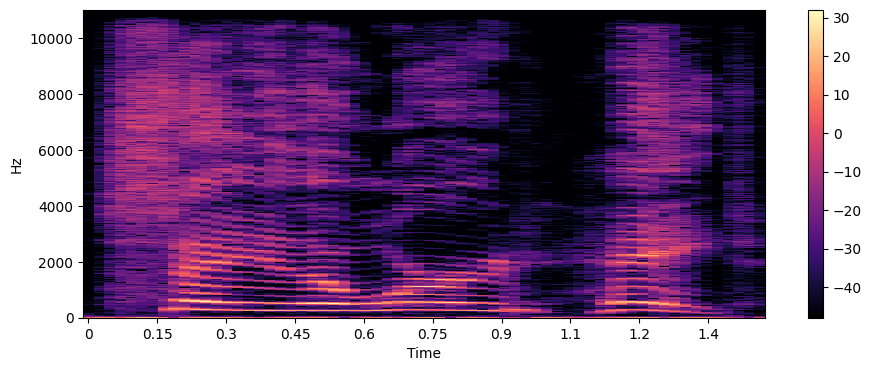

In [70]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

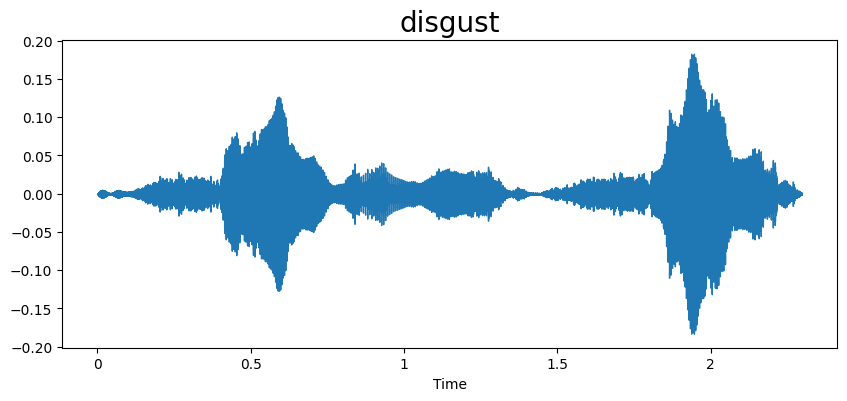

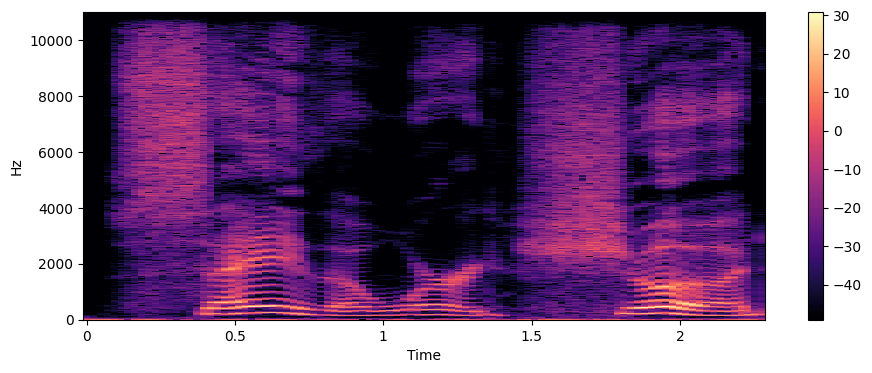

In [71]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

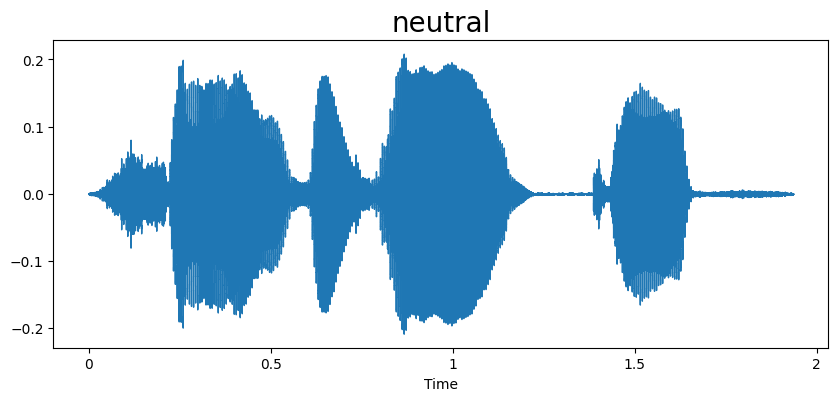

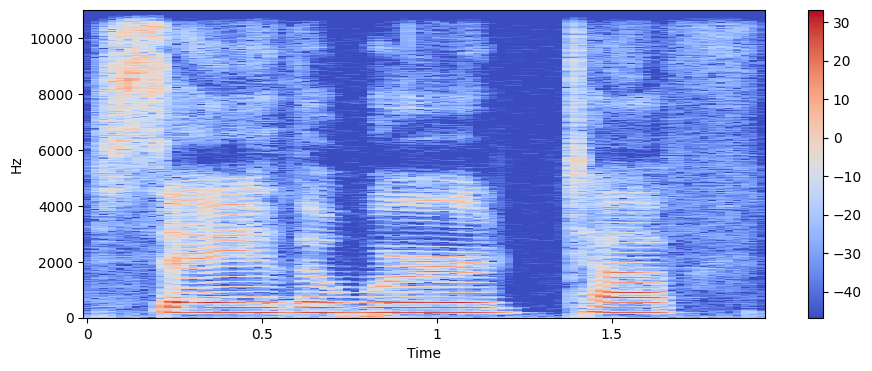

In [72]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

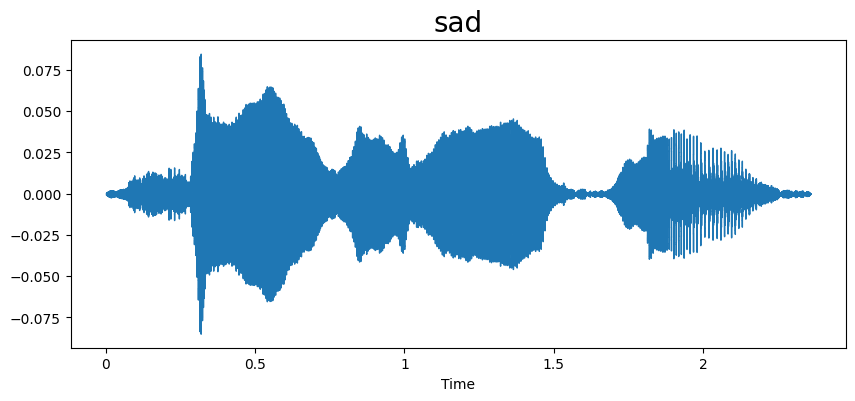

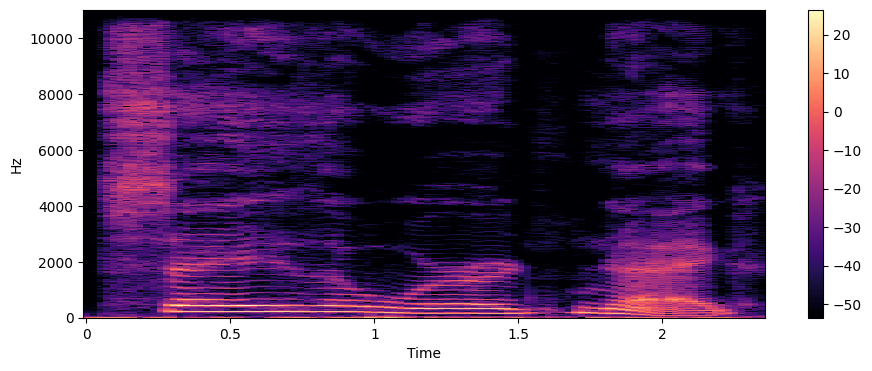

In [73]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

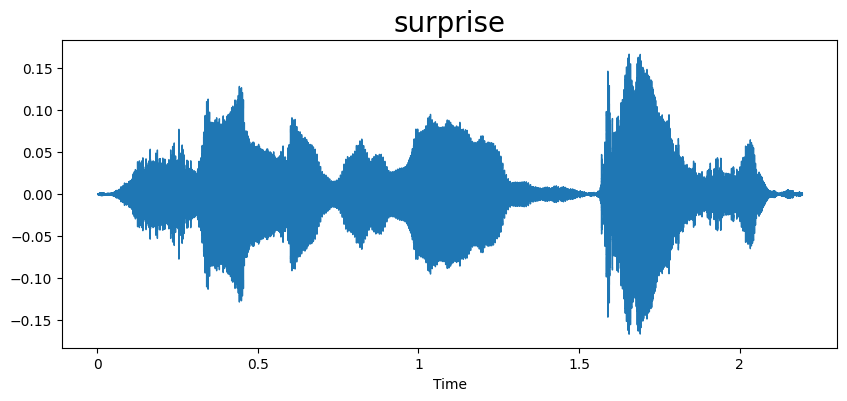

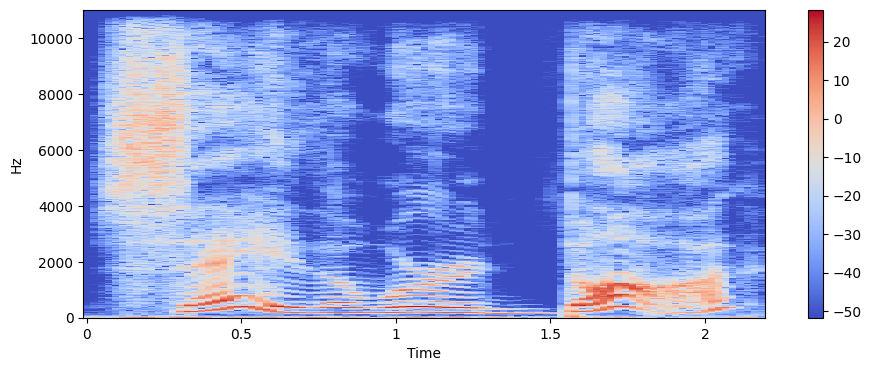

In [77]:
emotion = 'surprise'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

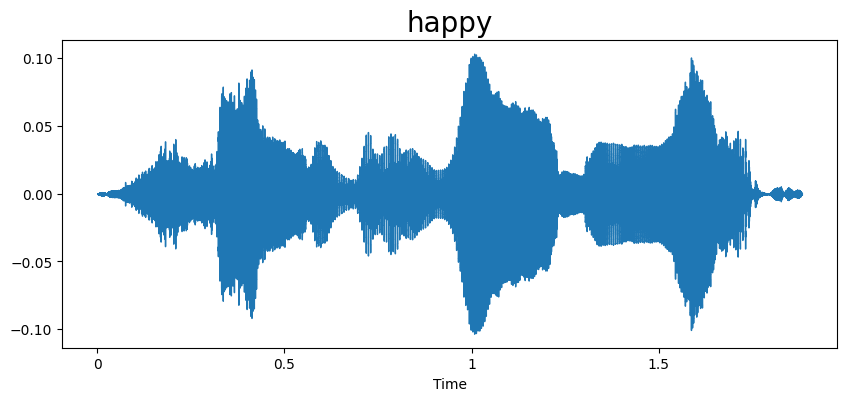

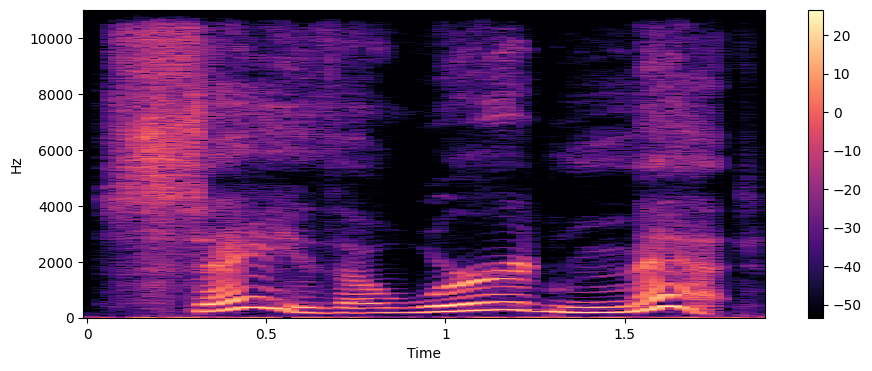

In [78]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [79]:
# @title feature extraction

In [80]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0 )
    return mfcc

In [81]:
extract_mfcc(df['speech'][0])

array([-499.28534  ,  131.38051  ,   14.61484  ,   -8.505296 ,
         -3.913761 ,    7.2382936,  -20.690502 ,   -0.5265068,
        -22.795649 ,   -8.097553 ,   -6.1475153,   -8.874653 ,
         -3.957349 ,   -3.3302894,   -2.387137 ,    2.6262727,
          1.031096 ,    6.3330736,    4.1090775,   -4.995784 ,
          2.07171  ,   -5.687704 ,    1.0357451,    4.888444 ,
         -5.0227365,    3.3294353,   -2.7093487,    3.9496117,
          5.2249904,    5.9597454,    8.950111 ,   12.906098 ,
         13.478798 ,    8.936478 ,   11.260578 ,   11.206078 ,
         10.414725 ,   10.877378 ,    7.2220974,    4.743988 ],
      dtype=float32)

In [82]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [83]:
X_mfcc

,speech
0,"[-499.28534, 131.38051, 14.61484, -8.505296, -..."
1,"[-441.33182, 113.11722, 17.325127, -13.18025, ..."
2,"[-434.06976, 111.498955, 41.991444, -5.9684324..."
3,"[-414.95715, 92.14921, 20.402058, -1.9017227, ..."
4,"[-489.7352, 123.720634, 22.084352, 8.003033, -..."
...,...
5595,"[-455.739, 106.42544, 7.565088, 14.144337, -29..."
5596,"[-424.51425, 95.32485, -1.6507325, 37.644062, ..."
5597,"[-409.6209, 105.88283, -21.932735, 8.138542, -..."
5598,"[-453.90457, 103.89699, -0.025447933, 15.61161..."


In [84]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [88]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [89]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [90]:
y = y.toarray()

In [91]:
y.shape

(5600, 7)

In [92]:
# @title Create the LSTM Model

In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# @title Train the model
history = model.fit(X,y,validation_split=0.2,epochs=50,batch_size=64)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 1.0000 - loss: 1.1761e-05 - val_acc: 1.0000 - val_loss: 2.4480e-09
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 1.0000 - loss: 2.0623e-06 - val_acc: 1.0000 - val_loss: 2.3416e-09
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 1.0000 - loss: 5.2280e-07 - val_acc: 1.0000 - val_loss: 2.2352e-09
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 1.0000 - loss: 2.2797e-06 - val_acc: 1.0000 - val_loss: 2.0223e-09
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 1.0000 - loss: 1.1591e-06 - val_acc: 1.0000 - val_loss: 2.0223e-09
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 1.0000 - loss: 2.8051e-06 - val_acc: 1.0000 - val_loss: 2.0223e-09
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 1.0000 - loss: 2.8474e-06 - val_acc: 1.0000 - val_loss: 2.0223e-09
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 1.0000 - loss: 1.9576e-06 - val_acc: 1.0000 - val_loss: 1.9159e-09
Epoc

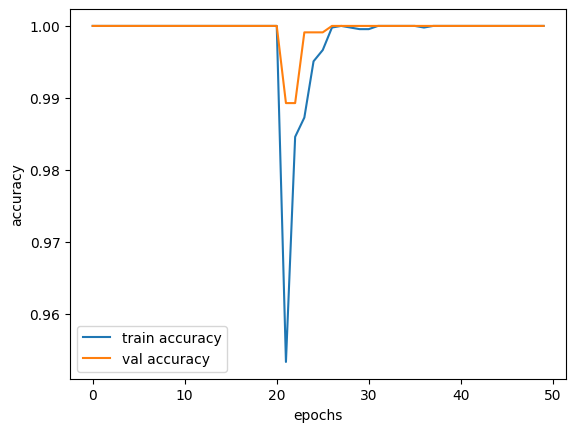

In [105]:
epochs = list(range(50))
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

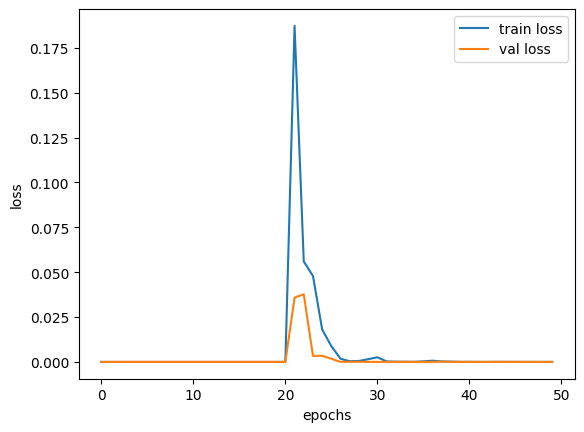

In [106]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()